# In Stock Monitor
#### A web scraper that helps me monitor the in stock status of animal crossing consoles.

In [69]:
# Python script for Amazon product availability checker 

# importing libraries 
from lxml import html 
import requests 
from time import sleep 
import time 
import schedule 
import smtplib
import re
from bs4 import BeautifulSoup

In [22]:
# Email id for who want to check availability 
receiver_email_id = "hongjunwu@Hotmail.com"

# URL for different shops
amazonURL = "https://www.amazon.com/Nintendo-Switch-Animal-Crossing-New-Horizons/dp/B084DDDNRP/index.html"
bestBuyURL = "https://www.bestbuy.com/site/nintendo-switch-animal-crossing-new-horizons-edition-32gb-console-multi/6401728.p?skuId=6401728"
gamestopURL = "https://www.gamestop.com/video-games/switch/consoles/products/nintendo-switch-animal-crossing-new-horizons-edition/11100143.html"
walmartURL = "https://www.walmart.com/ip/Nintendo-Switch-Console-Animal-Crossing-New-Horizons-Edition/539083068"
targetURL = "https://www.target.com/p/nintendo-switch-animal-crossing-new-horizon-special-edition/-/A-79494599"

In [37]:
print("PPP")

PPP


In [105]:
def checkAmazon(amazonURL): 
    print("Checking Amazon in stock status...")
    headers = {'User-Agent': 'Mozilla/5.0 (iPhone; CPU iPhone OS 12_1 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) CriOS/80.0.3987.95 Mobile/15E148 Safari/605.1'}  
    page = requests.get(amazonURL, headers = headers)  

    soup = BeautifulSoup(page.content, 'html.parser')
    print(soup)
    has_buy_now_button = bool(soup.find(id='buyNow'))
    print(soup.find_all(string= "Switch"))
    print(has_buy_now_button)
    
  

Checking Amazon in stock status...
<!DOCTYPE html>
<html class="a-no-js a-touch a-mobile" data-19ax5a9jf="mongoose" lang="en-us"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta content="width=device-width, maximum-scale=1, minimum-scale=1, initial-scale=1, user-scalable=no, shrink-to-fit=no" name="viewport"/><meta charset="utf-8"/>
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script><!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/><link href="https://images-na.ssl-images-amazon.com" rel="dns-prefetch"/><link href="https://m.media-amazon.com" rel="dns-prefetch"/><link href="https://completion.amazon.com" rel="dns-prefetch"/><script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){re
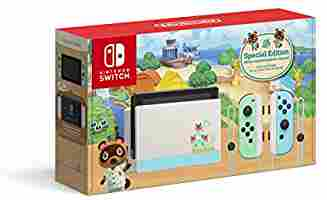

In [106]:
checkAmazon("https://www.amazon.com/Nintendo-Switch-Animal-Crossing-New-Horizons/dp/B084DDDNRP/ref=sr_1_3?keywords=switch&qid=1585161436&sr=8-3")

In [52]:
def check(url): 
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.149 Safari/537.36'} 
      
    # adding headers to show that you are 
    # a browser who is sending GET request 
    page = requests.get(url, headers = headers)  
    for i in range(20): 
        # because continuous checks in  
        # milliseconds or few seconds 
        # blocks your request 
        sleep(3)  
          
        # parsing the html content 
        doc = html.fromstring(page.content) 
          
        # checking availaility 
        XPATH_AVAILABILITY = '//div[@id ="availability"]//text()'
        RAw_AVAILABILITY = doc.xpath(XPATH_AVAILABILITY) 
        AVAILABILITY = ''.join(RAw_AVAILABILITY).strip() if RAw_AVAILABILITY else None
        return AVAILABILITY 
  
      
def sendemail(ans, product): 
    GMAIL_USERNAME = "YOUR_GMAIL_ID"
    GMAIL_PASSWORD = "YOUR_GMAIL_PASSWORD"
      
    recipient = receiver_email_id 
    body_of_email = ans 
    email_subject = product + ' product availability'
      
    # creates SMTP session  
    s = smtplib.SMTP('smtp.gmail.com', 587)  
      
    # start TLS for security  
    s.starttls()  
      
    # Authentication  
    s.login(GMAIL_USERNAME, GMAIL_PASSWORD)  
      
    # message to be sent  
    headers = "\r\n".join(["from: " + GMAIL_USERNAME, 
                        "subject: " + email_subject, 
                        "to: " + recipient, 
                        "mime-version: 1.0", 
                        "content-type: text/html"]) 
  
    content = headers + "\r\n\r\n" + body_of_email 
    s.sendmail(GMAIL_USERNAME, recipient, content) 
    s.quit()  
  
  
def ReadAsin(): 
    # Asin Id is the product Id which  
    # needs to be provided by the user 
    Asin = 'B084DDDNRP' 
    url = "http://www.amazon.in/dp/" + Asin 
    print ("Processing: "+url) 
    ans = check(url) 
    arr = [ 
        'Only 1 left in stock.', 
        'Only 2 left in stock.', 
        'In stock.'] 
    print(ans) 
    if ans in arr: 
        # sending email to user if  
        # in case product available  
        sendemail(ans, Asin)  
  
# scheduling same code to run multiple 
# times after every 1 minute  
def job(): 
    print("Tracking....")  
    ReadAsin() 
  
schedule.every(1).minutes.do(job) 
  
while True: 
      
    # running all pending tasks/jobs 
    schedule.run_pending()  
    time.sleep(1) 

Tracking....
Processing: http://www.amazon.in/dp/B084DDDNRP
None


KeyboardInterrupt: 

In [ ]:
job()

